In [3]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('t2kyoung_wcountry_wcontrib_everyone.csv')
# Convert the time to datetime
df['Member since']=pd.to_datetime(df['Member since'], format='%Y-%m-%d')

def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except:
        return pd.NaT  # Not a Time (pandas' version of None for datetime)

df['Last contribution'] = df['Last contribution'].apply(parse_date)
df['Ghost'] = [not x.year>0 for x in df['Last contribution']]

In [4]:
#I know I shouldn't edit the dataframe in this way, but is OK
new_aff = []
for x in df['Institute'].to_numpy():
    if 'IN2P3' in x:
        x=x.replace('(IN2P3)', 'IN2P3')
    elif 'WPI' in x:
        x=x.replace('(WPI)', 'WPI')
        
    new_aff.append(x)

df['Institute'] = new_aff

In [5]:
country_to_region_map = {'Belgium':'Europe', 'CERN':'Europe', 'Canada':'America', 'France':'Europe', 'Germany':'Europe', 'Hungary':'Europe',
       'Italy':'Europe', 'Japan':'Asia', 'Poland':'Europe', 'Russia':'Europe', 'Spain':'Europe', 'Switzerland':'Europe', 'UK':'Europe',
       'USA':'America', 'Vietnam':'Asia'}

In [6]:
#df

In [7]:
df['Region'] = [country_to_region_map[x] for x in df['Country']]

In [8]:
df_msc = df.loc['Student MSc' == df.Position]
df_phd = df.loc['Student PhD' == df.Position]
df_drs = df.loc['Postdoc' == df.Position]
df_yng = df.loc['Faculty' != df.Position]
df_fac = df.loc['Faculty' == df.Position]

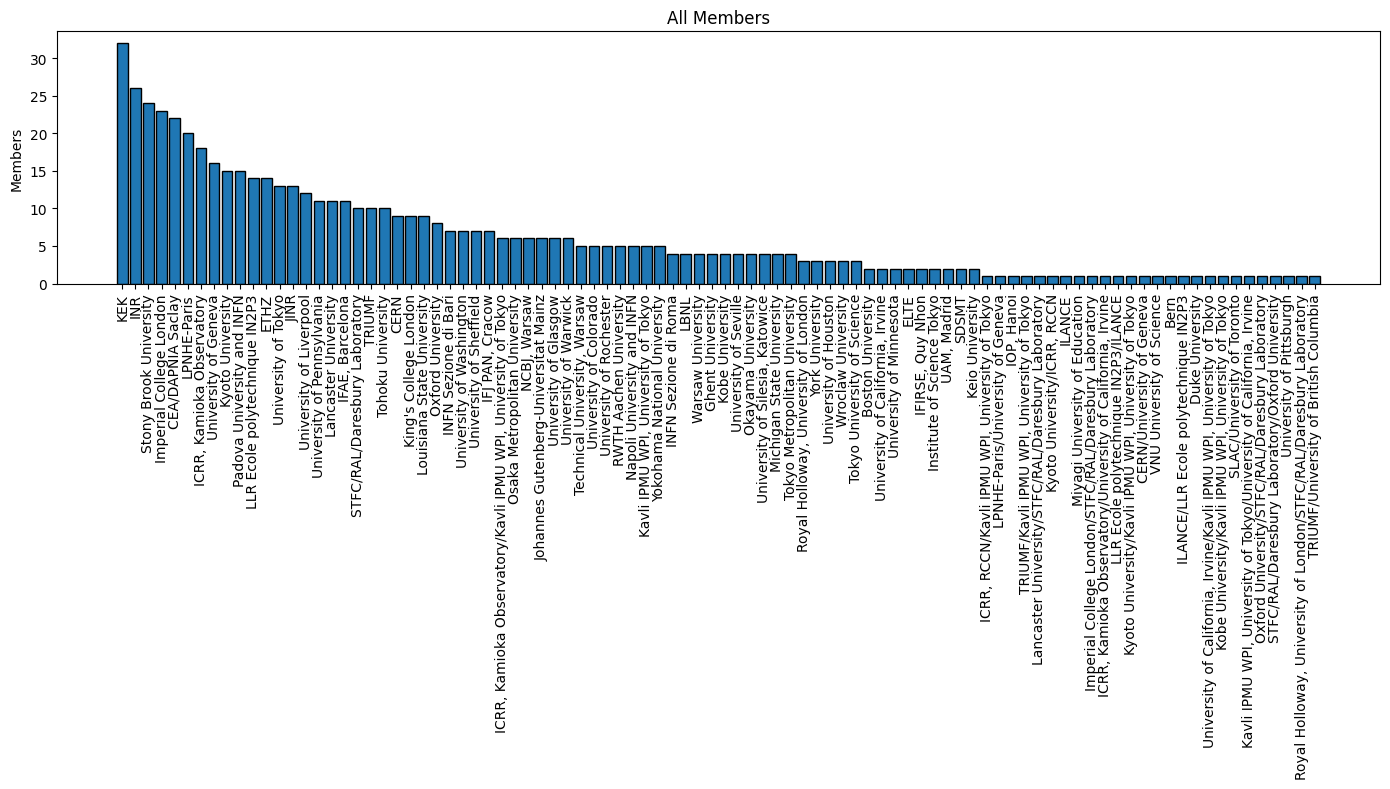

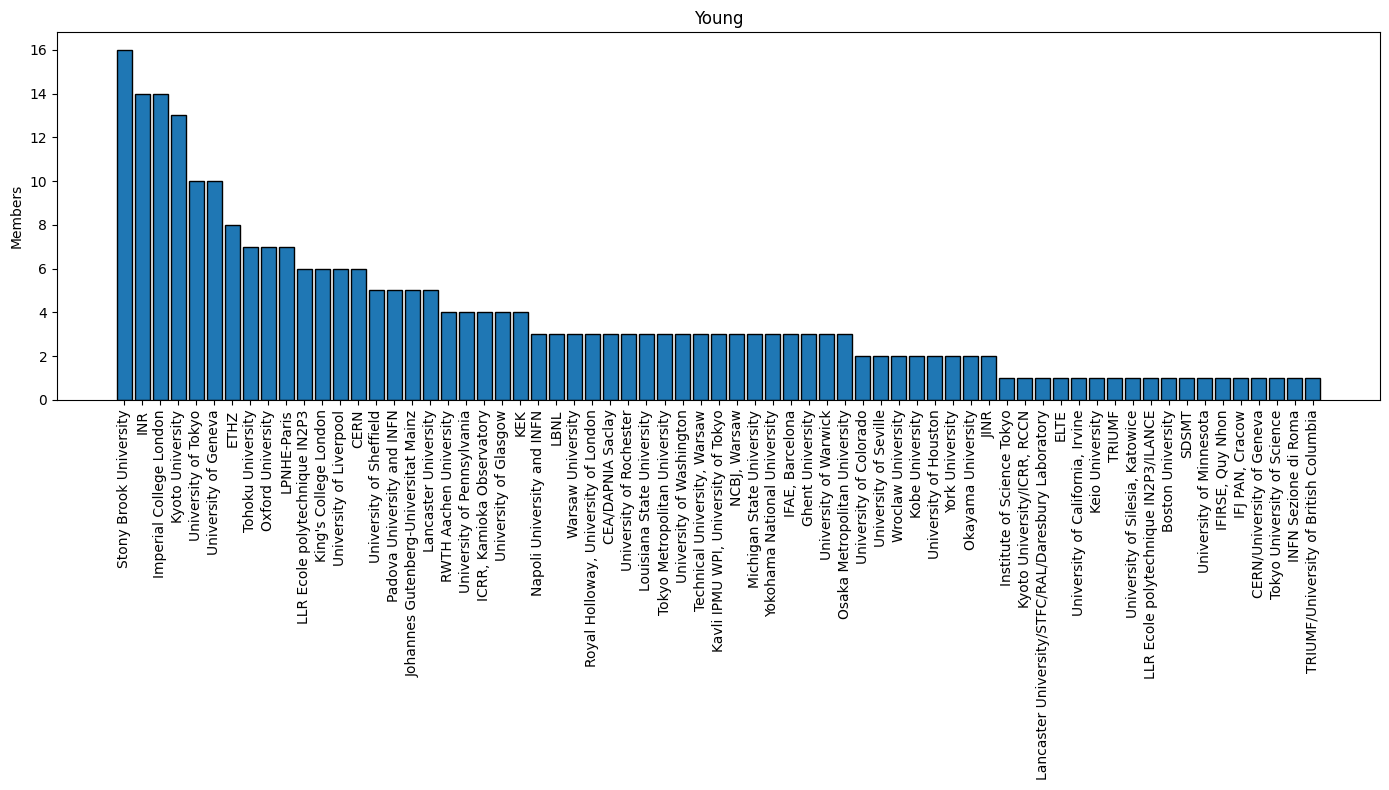

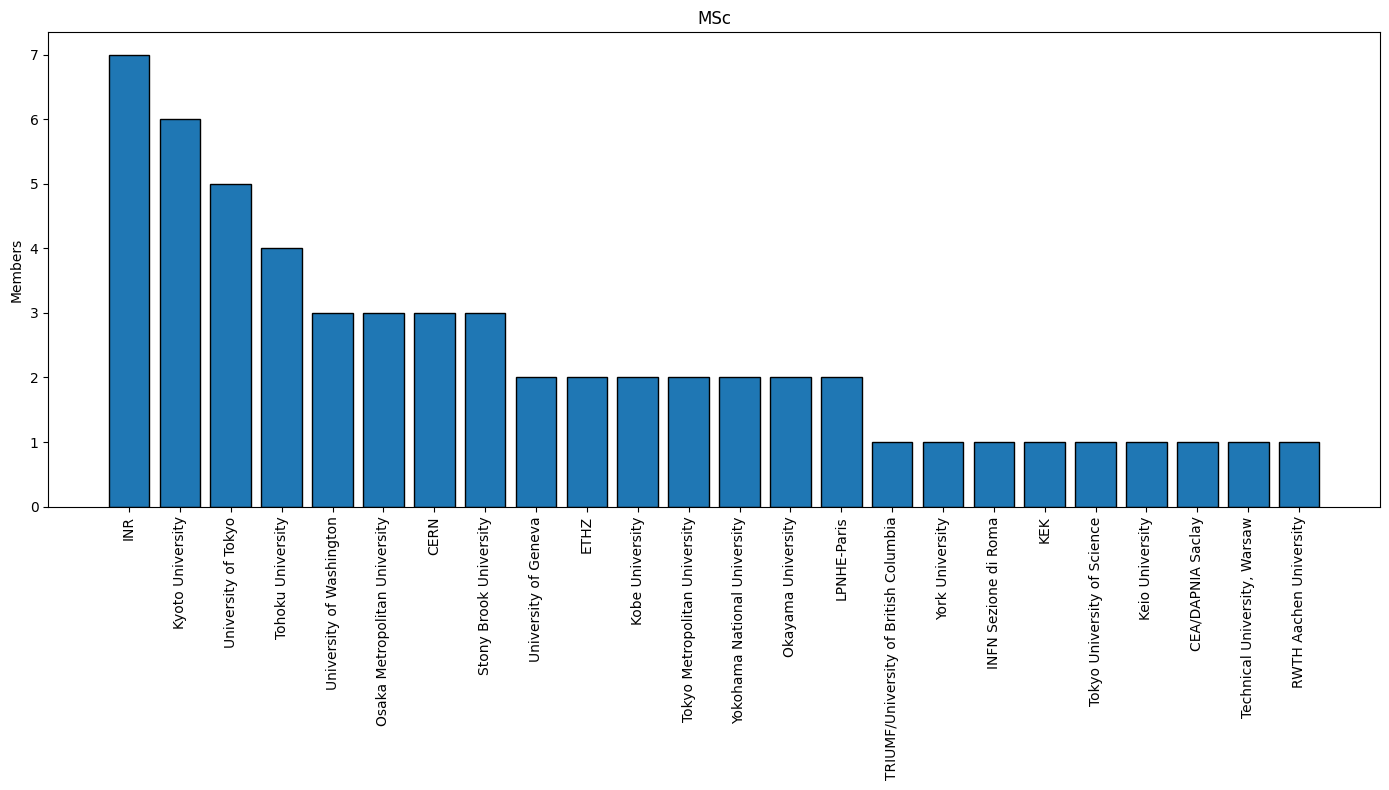

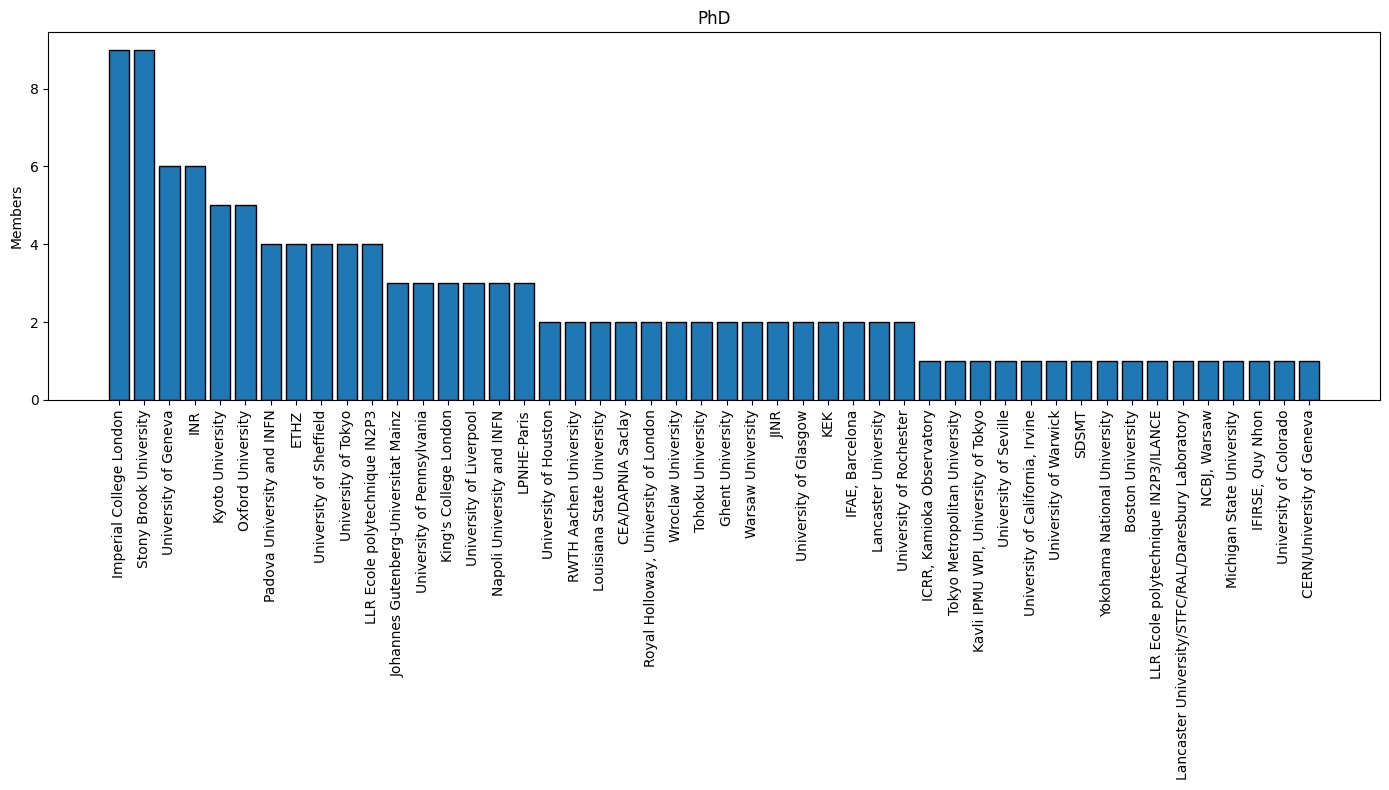

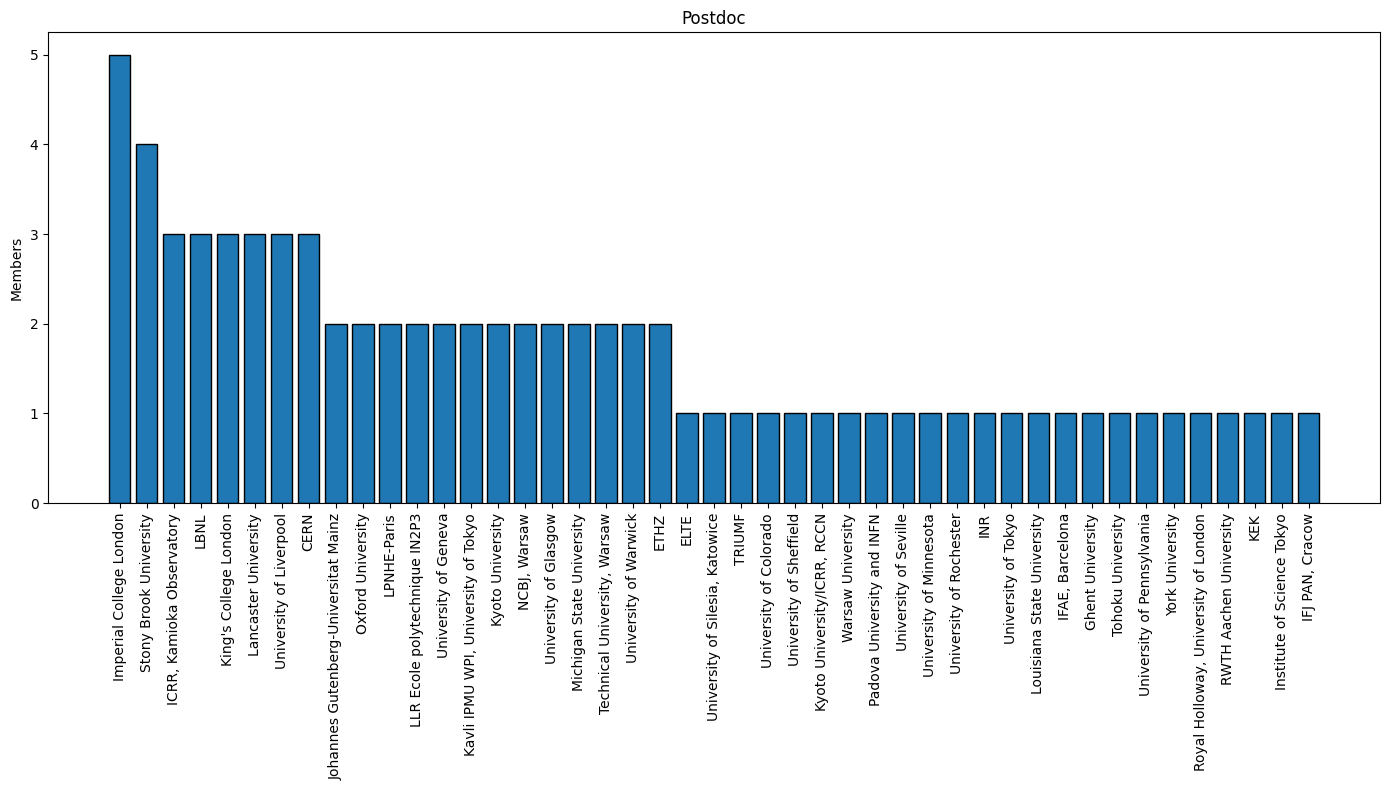

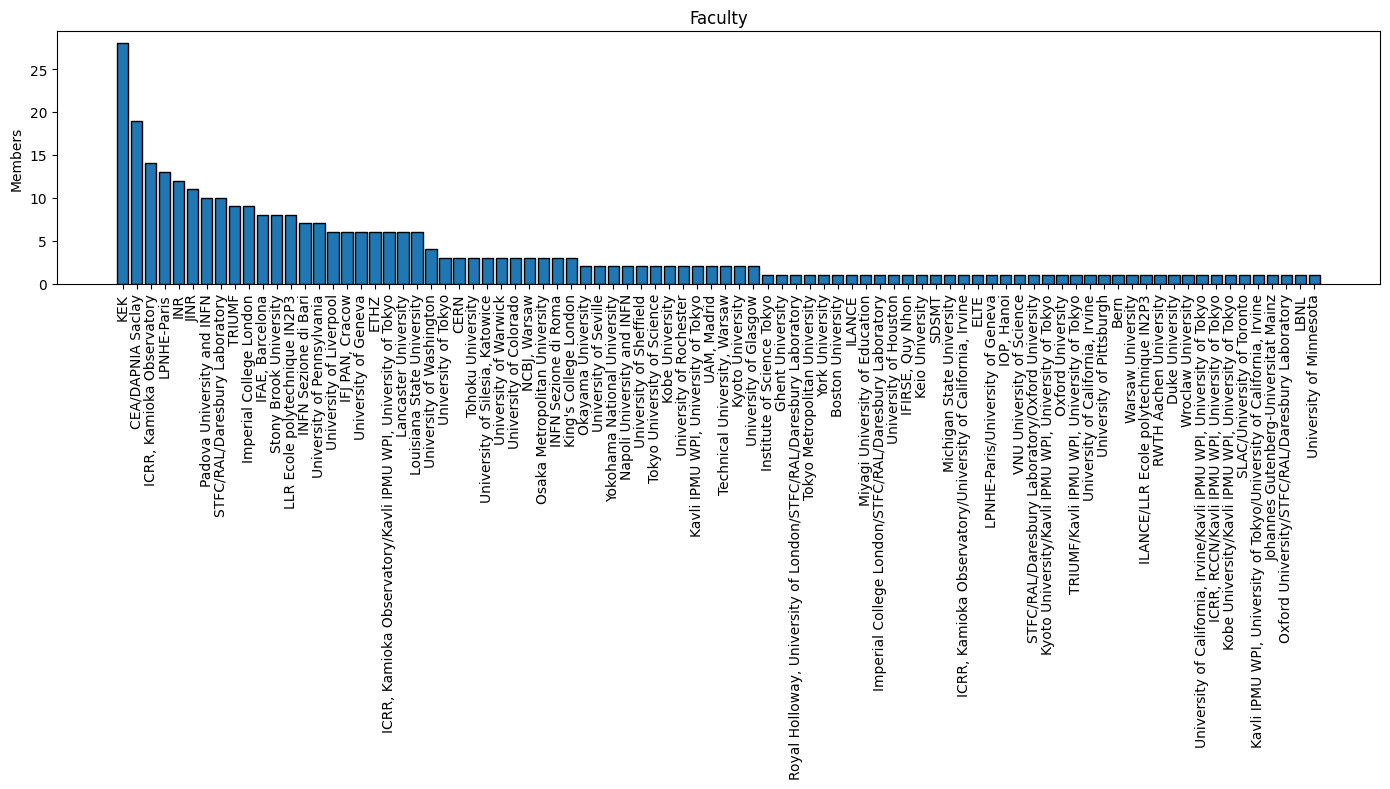

In [9]:
the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df,labels):

    # Assuming 'df' is your dataframe and 'Country' is the column you want to plot
    country_counts = the_df['Institute'].value_counts()
    
    # Sort the counts in descending order
    sorted_country_counts = country_counts.sort_values(ascending=False)
    
    # Create the histogram plot
    plt.figure(figsize=(14, 8))
    plt.bar(sorted_country_counts.index, sorted_country_counts.values, edgecolor='black')
    
    # Set the positions and labels for the x-axis
    plt.xticks(rotation=90, ha='center')
    
    # Adjust layout to make sure labels fit
    plt.tight_layout()
    
    # Set labels and title
    #plt.xlabel('Country')
    plt.ylabel('Members')
    plt.title(name)
    
    # Display the plot
    #plt.show()
    plt.tight_layout()
    plt.savefig('intitute_'+name+'.pdf')
    

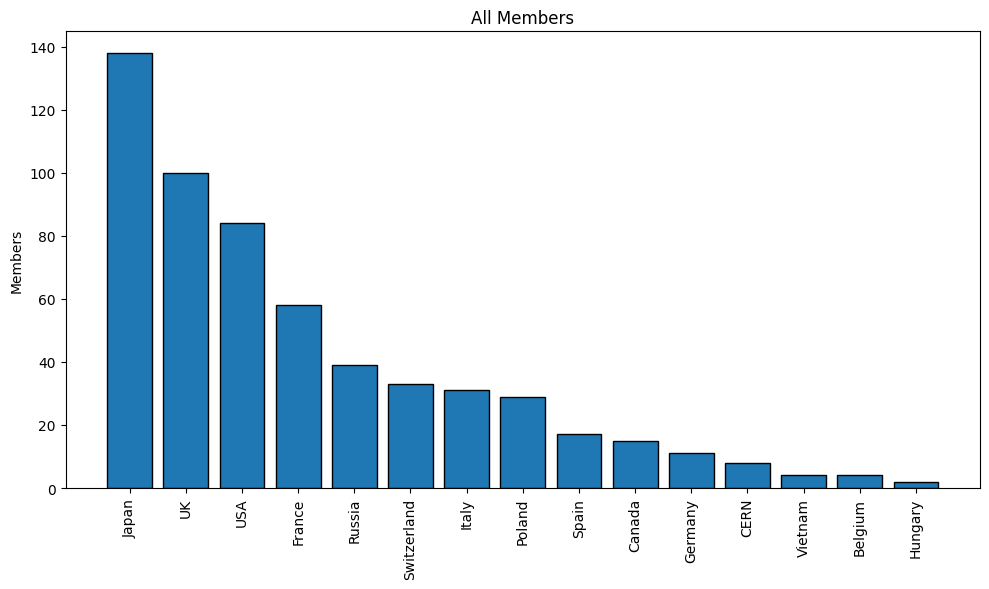

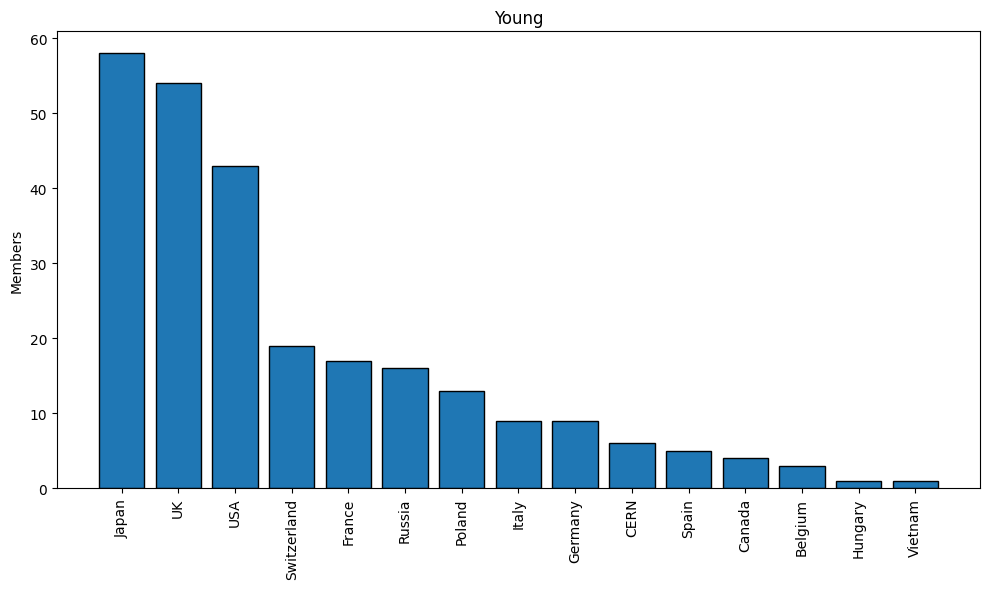

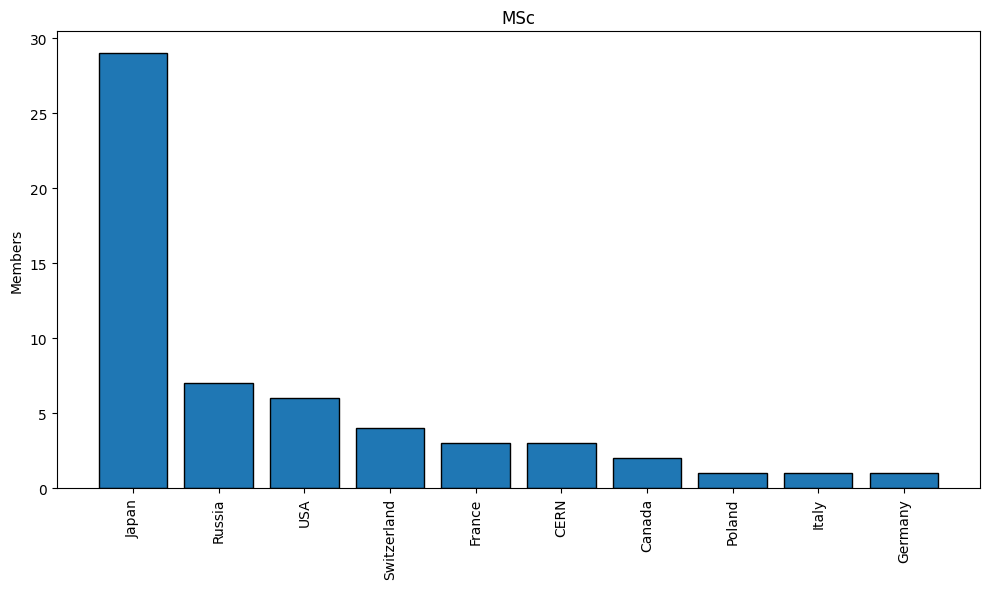

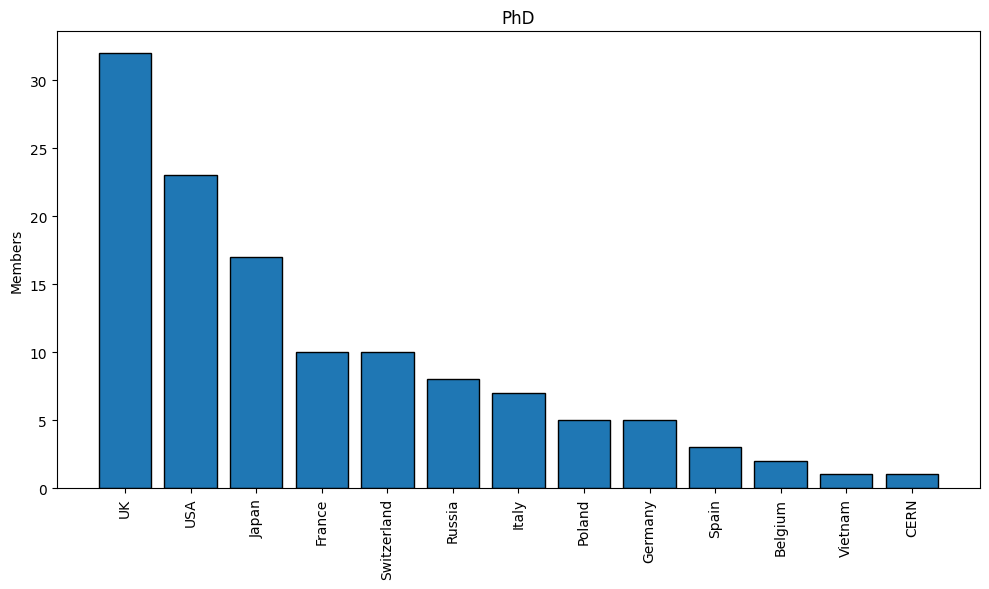

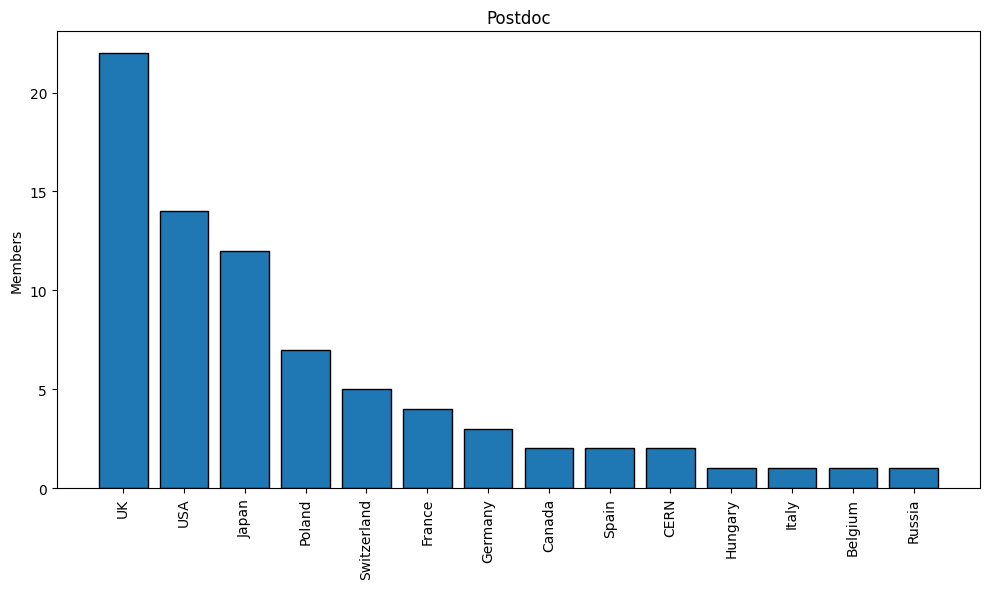

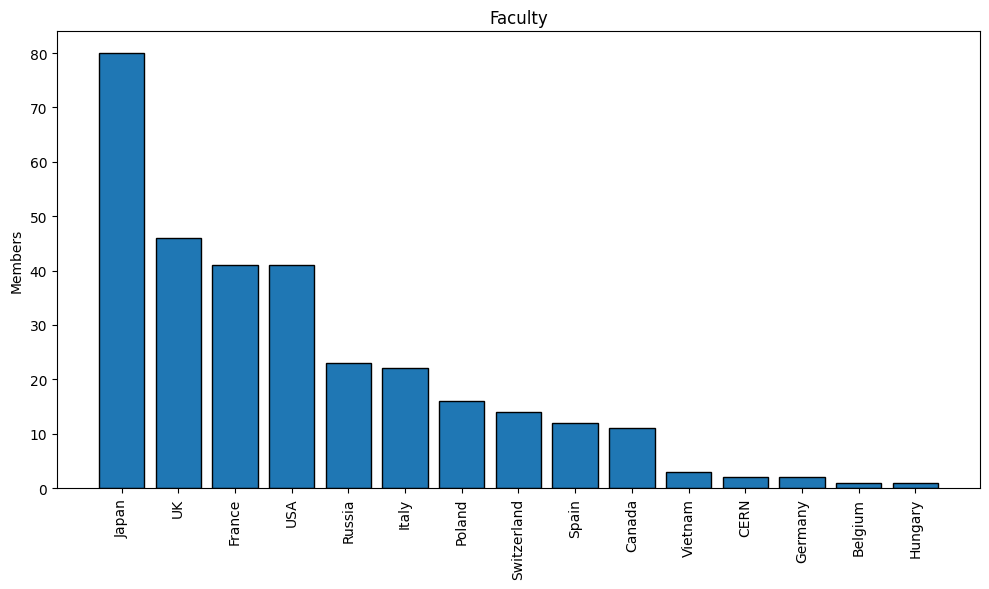

In [10]:
the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df,labels):

    # Assuming 'df' is your dataframe and 'Country' is the column you want to plot
    country_counts = the_df['Country'].value_counts()
    
    # Sort the counts in descending order
    sorted_country_counts = country_counts.sort_values(ascending=False)
    
    # Create the histogram plot
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_country_counts.index, sorted_country_counts.values, edgecolor='black')
    
    # Set the positions and labels for the x-axis
    plt.xticks(rotation=90, ha='center')
    
    # Adjust layout to make sure labels fit
    plt.tight_layout()
    
    # Set labels and title
    #plt.xlabel('Country')
    plt.ylabel('Members')
    plt.title(name)
    
    # Display the plot
    plt.tight_layout()
    plt.savefig('country_'+name+'.pdf')


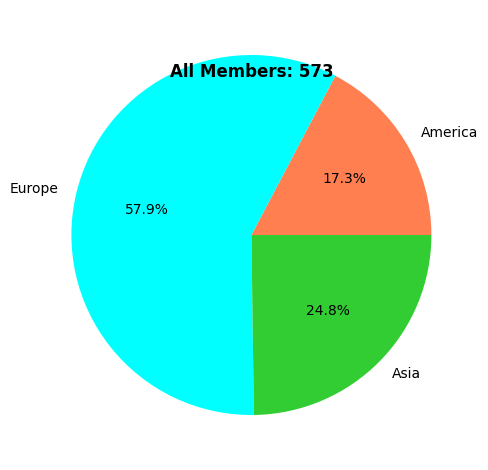

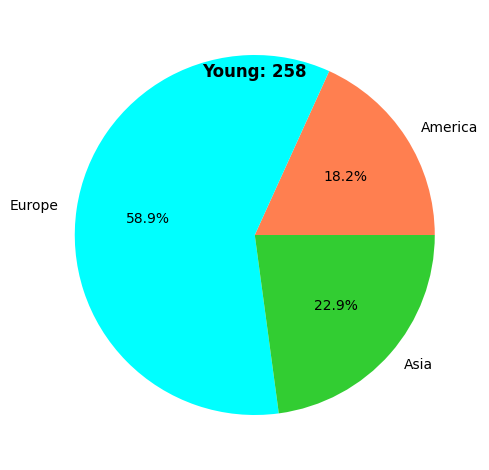

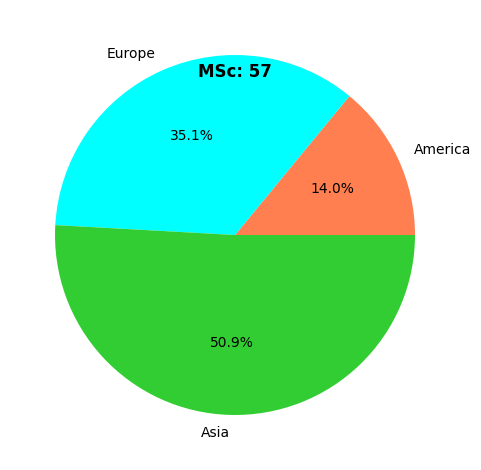

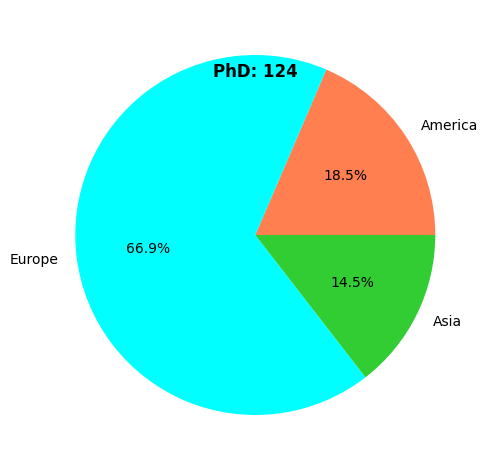

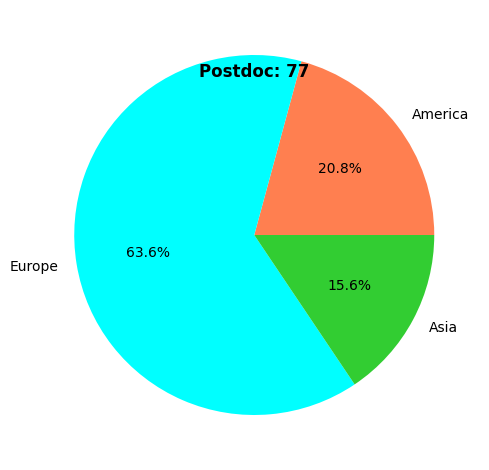

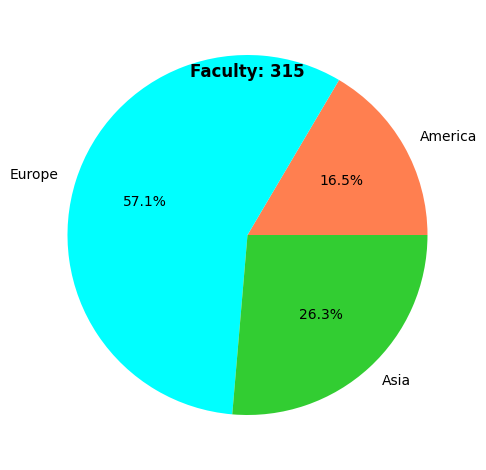

In [11]:
the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df,labels):

    df_am = the_df.loc['America' == the_df.Region]
    df_eu = the_df.loc['Europe' == the_df.Region]
    df_as = the_df.loc['Asia' == the_df.Region]
    
    labels = 'America', 'Europe', 'Asia'
    sizes = [len(df_am), len(df_eu), len(df_as)]
    fig, ax = plt.subplots()
    _ = ax.pie(sizes, labels=labels,  colors=['coral', 'cyan', 'limegreen'], autopct='%1.1f%%')
    fig.text(0.5, 0.84, name+f': {np.sum(sizes)}', ha='center', va='center', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.savefig('region_'+name+'.pdf')

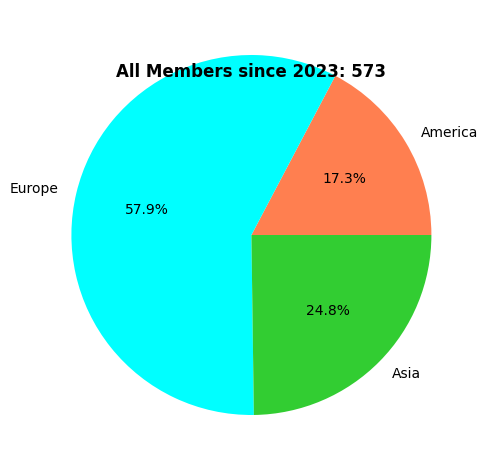

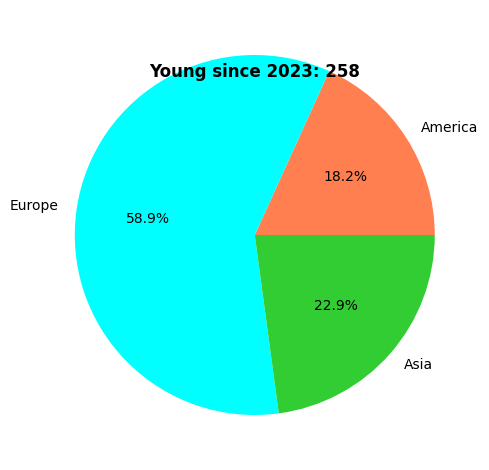

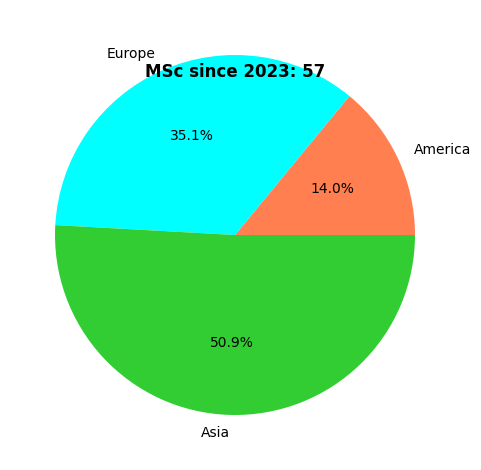

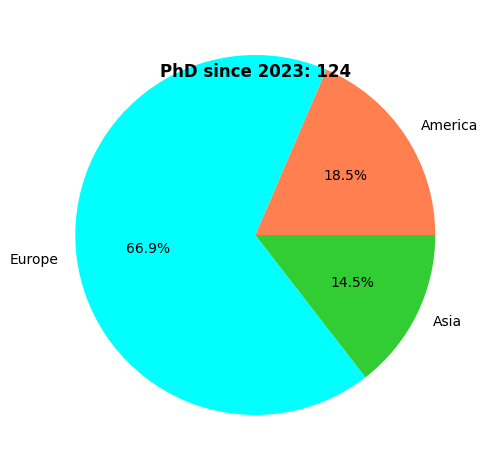

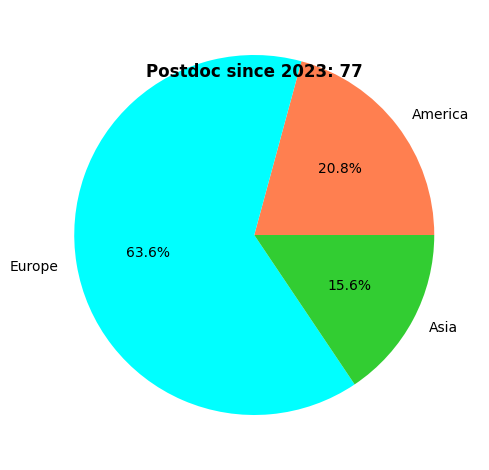

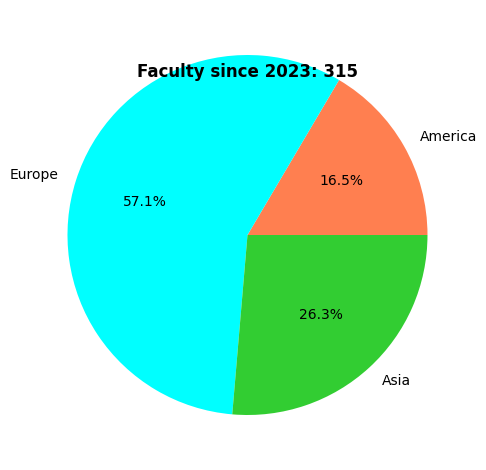

In [12]:
the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df,labels):

    recent_df = the_df.loc[the_df['Member since'].dt.year>=2023]

    df_am = the_df.loc['America' == the_df.Region]
    df_eu = the_df.loc['Europe' == the_df.Region]
    df_as = the_df.loc['Asia' == the_df.Region]
    
    labels = 'America', 'Europe', 'Asia'
    sizes = [len(df_am), len(df_eu), len(df_as)]
    fig, ax = plt.subplots()
    _ = ax.pie(sizes, labels=labels,  colors=['coral', 'cyan', 'limegreen'], autopct='%1.1f%%')
    fig.text(0.5, 0.84, name+' since 2023'+f': {np.sum(sizes)}', ha='center', va='center', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.savefig('region_recent_'+name+'.pdf')

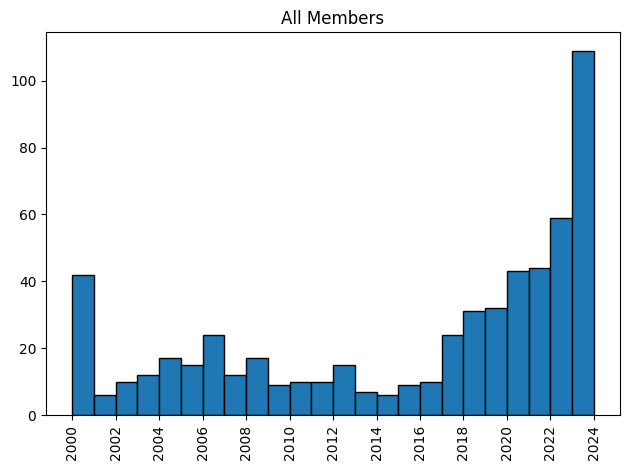

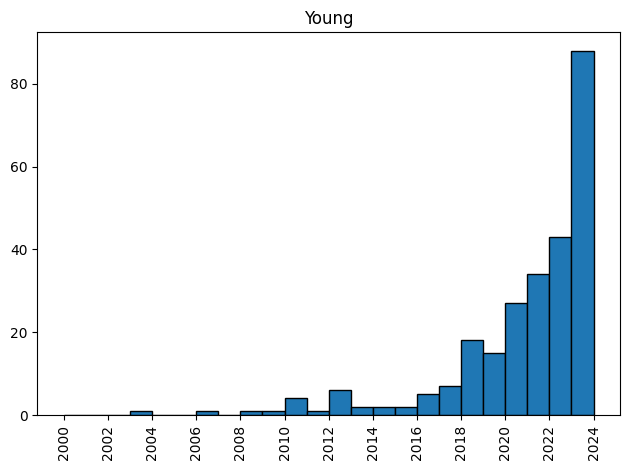

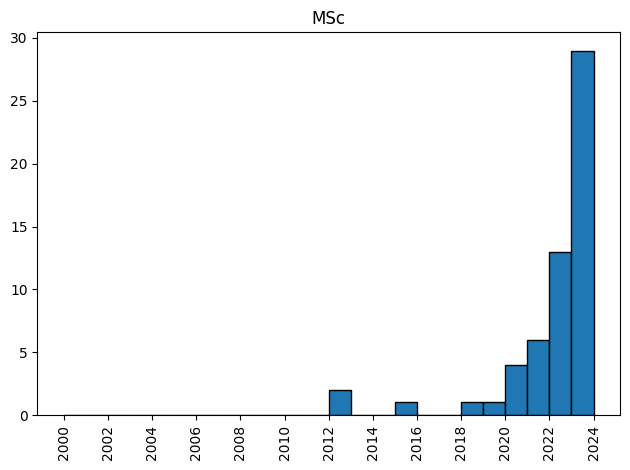

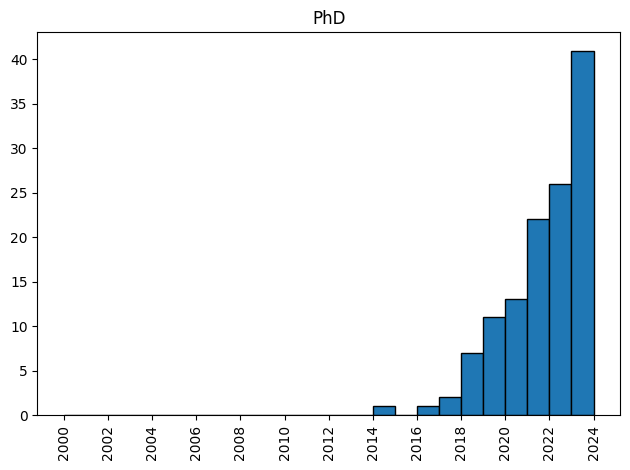

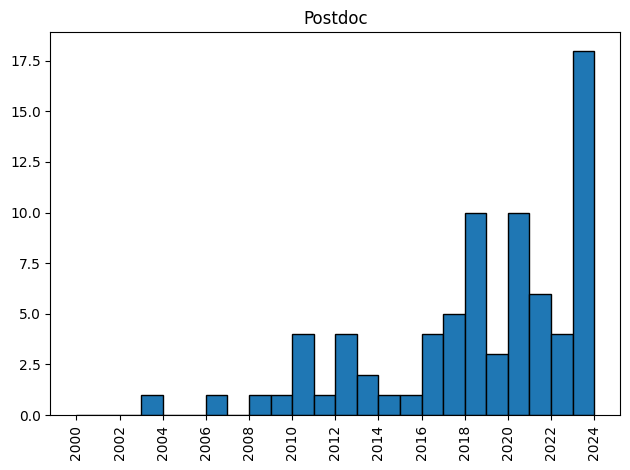

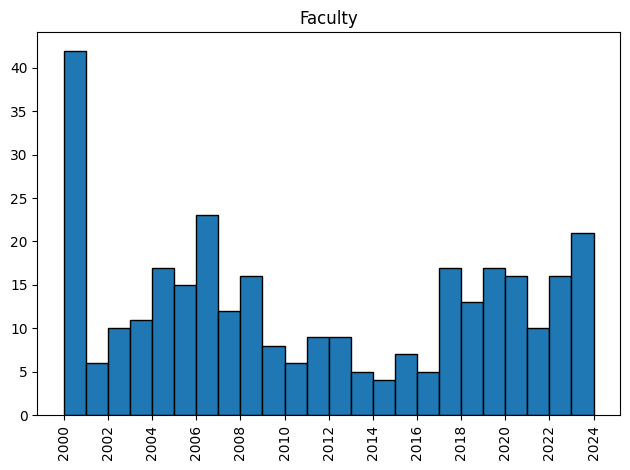

In [13]:
the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df,labels):
    plt.hist(the_df['Member since'].dt.year, bins=range(2000,2025), edgecolor='black')
    x_ticks = range(2000, 2025, 2)  # This will set ticks every 2 years
    plt.xticks(rotation=90, ha='center')
    _ = plt.gca().set_xticks(x_ticks)
    plt.gca().set_title(name)

    plt.tight_layout()
    plt.savefig('time_in_t2k_'+name+'.pdf')
    plt.show()

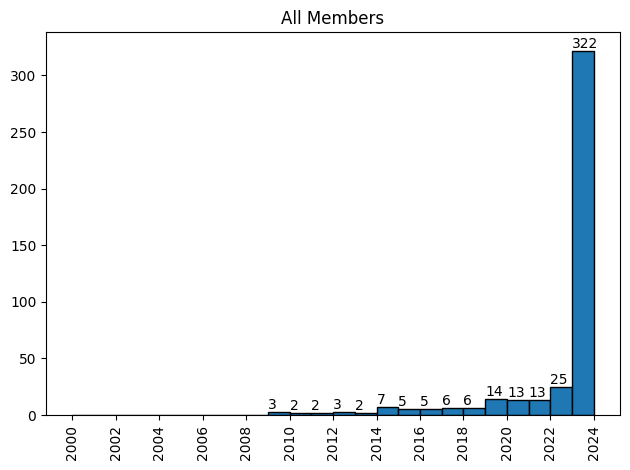

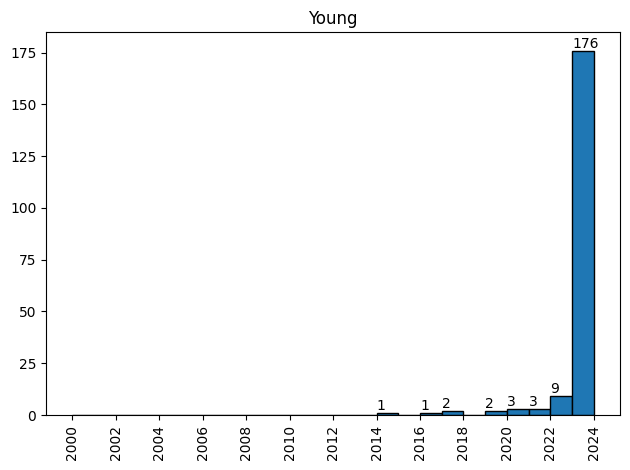

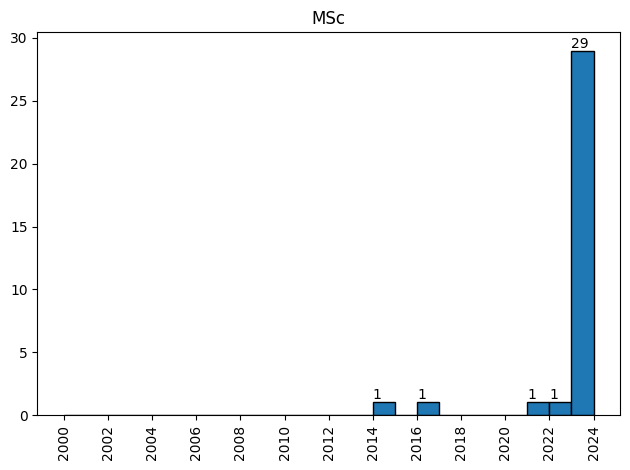

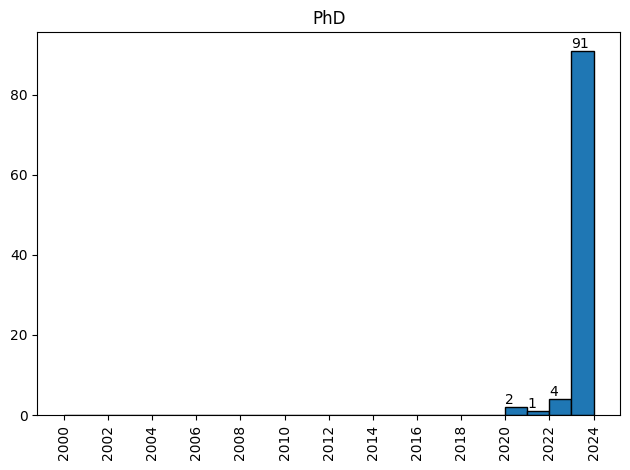

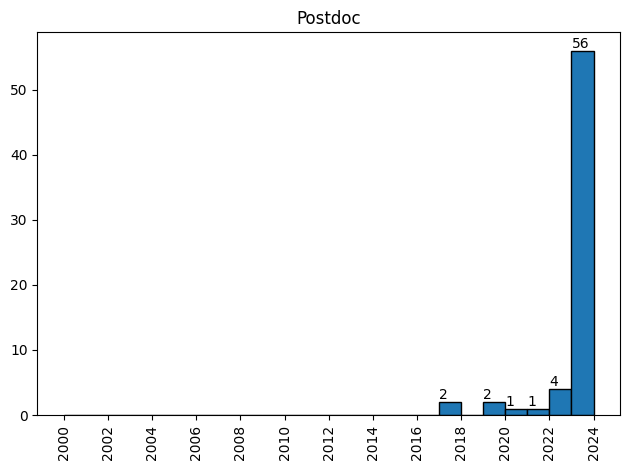

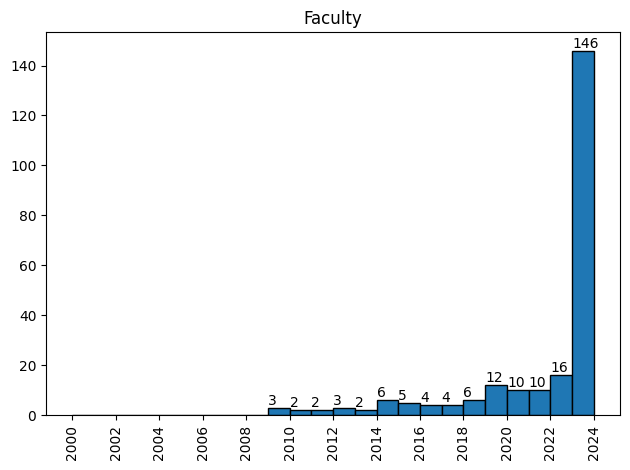

In [14]:
import matplotlib.pyplot as plt
import numpy as np

the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df, labels):
    counts, bins, _ = plt.hist(the_df['Last contribution'].dt.year, bins=range(2000, 2025), edgecolor='black')
    
    # Add count labels on top of each bar
    for i, count in enumerate(counts):
        if count:
            plt.text(bins[i], count, str(int(count)), ha='left', va='bottom')
    
    x_ticks = range(2000, 2025, 2)  # This will set ticks every 2 years
    plt.xticks(rotation=90, ha='center')
    plt.gca().set_xticks(x_ticks)
    plt.gca().set_title(name)
    plt.tight_layout()
    plt.savefig('last_contrib_in_t2k_' + name + '.pdf')
    plt.show()

In [15]:
pd.set_option('display.max_rows', None)

In [16]:
len(df.loc[df['Last contribution'].dt.year<2030]), len(df)

(428, 573)

In [17]:
len(df.loc[df['Last contribution'] == pd.NaT])

0

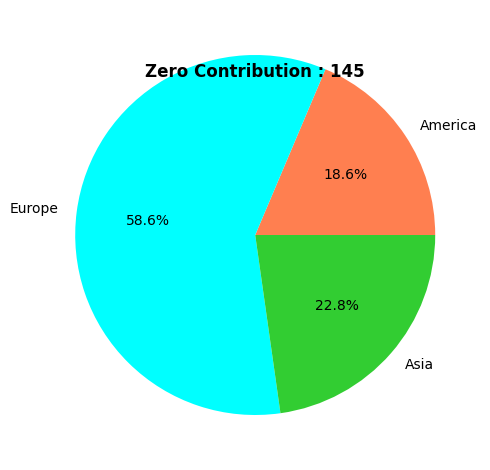

In [18]:
the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

#for the_df, name in zip(the_tested_df,labels):

ghost_df = df.loc[df['Ghost']==True]

df_am = ghost_df.loc['America' == ghost_df.Region]
df_eu = ghost_df.loc['Europe' == ghost_df.Region]
df_as = ghost_df.loc['Asia' == ghost_df.Region]

labels = 'America', 'Europe', 'Asia'
sizes = [len(df_am), len(df_eu), len(df_as)]
fig, ax = plt.subplots()
_ = ax.pie(sizes, labels=labels,  colors=['coral', 'cyan', 'limegreen'], autopct='%1.1f%%')
fig.text(0.5, 0.84, 'Zero Contribution '+f': {np.sum(sizes)}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
#plt.savefig('region_recent_'+name+'.pdf')

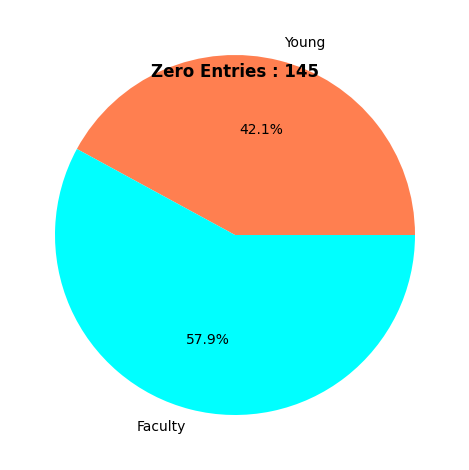

In [19]:
the_tested_df = [df_yng, df_fac]
labels = ['Young', 'Faculty']

sizes = []
for the_df in the_tested_df:

    ghost_df = the_df.loc[the_df['Ghost']==True]
    sizes.append(len(ghost_df))
    
fig, ax = plt.subplots()
_ = ax.pie(sizes, labels=labels,  colors=['coral', 'cyan', 'limegreen', 'blue', 'orange', 'pink'], autopct='%1.1f%%')
fig.text(0.5, 0.84, 'Zero Entries '+f': {np.sum(sizes)}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('fac_vs_young.pdf')

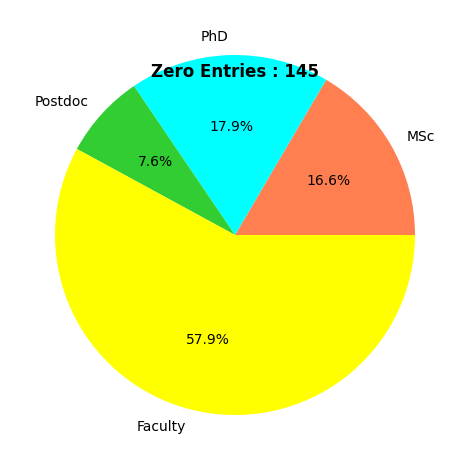

In [20]:
the_tested_df = [df_msc, df_phd, df_drs, df_fac]
labels = ['MSc', 'PhD', 'Postdoc', 'Faculty']

sizes = []
for the_df in the_tested_df:

    ghost_df = the_df.loc[the_df['Ghost']==True]
    sizes.append(len(ghost_df))
    
fig, ax = plt.subplots()
_ = ax.pie(sizes, labels=labels,  colors=['coral', 'cyan', 'limegreen', 'yellow', 'orange', 'pink'], autopct='%1.1f%%')
fig.text(0.5, 0.84, 'Zero Entries '+f': {np.sum(sizes)}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('zero_entries_by_position.pdf')

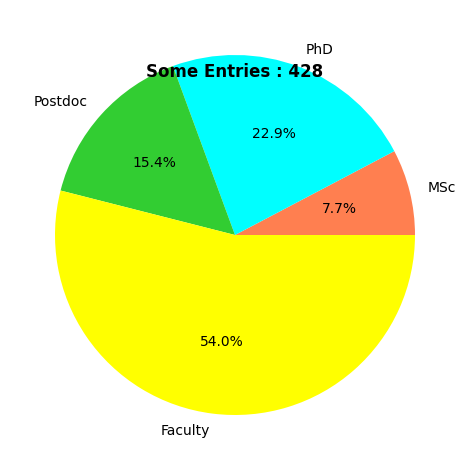

In [21]:
the_tested_df = [df_msc, df_phd, df_drs, df_fac]
labels = ['MSc', 'PhD', 'Postdoc', 'Faculty']

sizes = []
for the_df in the_tested_df:

    ghost_df = the_df.loc[the_df['Ghost']==False]
    sizes.append(len(ghost_df))
    
fig, ax = plt.subplots()
_ = ax.pie(sizes, labels=labels,  colors=['coral', 'cyan', 'limegreen', 'yellow', 'orange', 'pink'], autopct='%1.1f%%')
fig.text(0.5, 0.84, 'Some Entries '+f': {np.sum(sizes)}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('non_zero_entries_by_position.pdf')

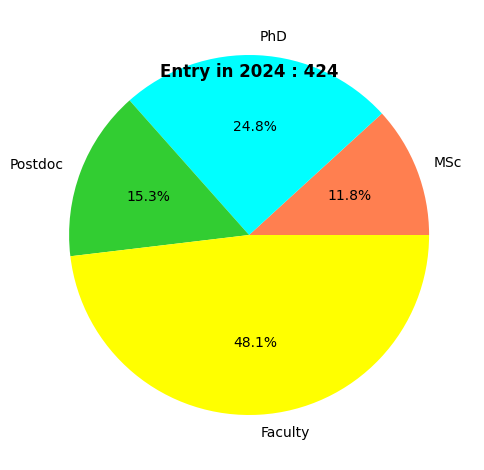

In [22]:
the_tested_df = [df_msc, df_phd, df_drs, df_fac]
labels = ['MSc', 'PhD', 'Postdoc', 'Faculty']

sizes = []
for the_df in the_tested_df:

    active_df = the_df.loc[(the_df['Ghost']==True) | (df['Last contribution'].dt.year==2024)]
    sizes.append(len(active_df))
    
fig, ax = plt.subplots()
_ = ax.pie(sizes, labels=labels,  colors=['coral', 'cyan', 'limegreen', 'yellow', 'orange', 'pink'], autopct='%1.1f%%')
fig.text(0.5, 0.84, 'Entry in 2024 '+f': {np.sum(sizes)}', ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('entries_2024_by_position.pdf')

In [23]:
alist = ["\author{K.\,Abe}\INSTBJ",
"\author{N.\,Akhlaq}\INSTFA",
"\author{R.\,Akutsu}\INSTCB",
"\author{A.\,Ali}\INSTGH\INSTB",
"\author{S.\,Alonso Monsalve}\INSTEF",
"\author{C.\,Alt}\INSTEF",
"\author{C.\,Andreopoulos}\INSTFC",
"\author{M.\,Antonova}\INSTEC",
"\author{S.\,Aoki}\INSTCC",
"\author{T.\,Arihara}\INSTGI",
"\author{Y.\,Asada}\INSTHE",
"\author{Y.\,Ashida}\INSTCD",
"\author{E.T.\,Atkin}\INSTEI",
"\author{M.\,Barbi}\INSTE",
"\author{G.J.\,Barker}\INSTFD",
"\author{G.\,Barr}\INSTGG",
"\author{D.\,Barrow}\INSTGG",
"\author{M.\,Batkiewicz-Kwasniak}\INSTDG",
"\author{F.\,Bench}\INSTFC",
"\author{V.\,Berardi}\INSTGF",
"\author{L.\,Berns}\INSTIJ",
"\author{S.\,Bhadra}\INSTH",
"\author{A.\,Blanchet}\INSTEG",
"\author{A.\,Blondel}\INSTBB\INSTEG",
"\author{S.\,Bolognesi}\INSTI",
"\author{T.\,Bonus}\INSTEA",
"\author{S.\,Bordoni }\INSTEG",
"\author{S.B.\,Boyd}\INSTFD",
"\author{A.\,Bravar}\INSTEG",
"\author{C.\,Bronner}\INSTBJ",
"\author{S.\,Bron}\INSTB",
"\author{A.\,Bubak}\INSTDI",
"\author{M.\,Buizza Avanzini}\INSTBA",
"\author{J.A.\,Caballero}\INSTJB",
"\author{N.F.\,Calabria}\INSTGF",
"\author{S.\,Cao}\INSTHH",
"\author{D.\,Carabadjac}\thanks{also at Universit\'e Paris-Saclay}\INSTBA",
"\author{A.J.\,Carter}\INSTHC",
"\author{S.L.\,Cartwright}\INSTFB",
"\author{M.P.\,Casado}\INSTED",
"\author{M.G.\,Catanesi}\INSTGF",
"\author{A.\,Cervera}\INSTEC",
"\author{J.\,Chakrani}\INSTBA",
"\author{D.\,Cherdack}\INSTIB",
"\author{P.S.\,Chong}\INSTIC",
"\author{G.\,Christodoulou}\INSTIE",
"\author{A.\,Chvirova}\INSTEB",
"\author{M.\,Cicerchia}\thanks{also at INFN-Laboratori Nazionali di Legnaro}\INSTBF",
"\author{J.\,Coleman}\INSTFC",
"\author{G.\,Collazuol}\INSTBF",
"\author{L.\,Cook}\INSTGG\INSTHA",
"\author{A.\,Cudd}\INSTGB",
"\author{C.\,Dalmazzone}\INSTBB",
"\author{T.\,Daret}\INSTI",
"\author{Yu.I.\,Davydov}\INSTIH",
"\author{A.\,De Roeck}\INSTIE",
"\author{G.\,De Rosa}\INSTBE",
"\author{T.\,Dealtry}\INSTEJ",
"\author{C.C.\,Delogu}\INSTBF",
"\author{C.\,Densham}\INSTEH",
"\author{A.\,Dergacheva}\INSTEB",
"\author{F.\,Di Lodovico}\INSTIF",
"\author{S.\,Dolan}\INSTIE",
"\author{D.\,Douqa}\INSTEG",
"\author{T.A.\,Doyle}\INSTFJ",
"\author{O.\,Drapier}\INSTBA",
"\author{J.\,Dumarchez}\INSTBB",
"\author{P.\,Dunne}\INSTEI",
"\author{K.\,Dygnarowicz}\INSTDH",
"\author{A.\,Eguchi}\INSTCH",
"\author{S.\,Emery-Schrenk}\INSTI",
"\author{G.\,Erofeev}\INSTEB",
"\author{A.\,Ershova}\INSTI",
"\author{G.\,Eurin}\INSTI",
"\author{D.\,Fedorova}\INSTEB",
"\author{S.\,Fedotov}\INSTEB",
"\author{M.\,Feltre}\INSTBF",
"\author{A.J.\,Finch}\INSTEJ",
"\author{G.A.\,Fiorentini Aguirre}\INSTH",
"\author{G.\,Fiorillo}\INSTBE",
"\author{M.D.\,Fitton}\INSTEH",
"\author{J.M.\,Franco Pati\~no}\INSTJB",
"\author{M.\,Friend}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{Y.\,Fujii}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{Y.\,Fukuda}\INSTCE",
"\author{Y.\,Furui}\INSTGI",
"\author{K.\,Fusshoeller}\INSTEF",
"\author{L.\,Giannessi}\INSTEG",
"\author{C.\,Giganti}\INSTBB",
"\author{V.\,Glagolev}\INSTIH",
"\author{M.\,Gonin}\INSTJD",
"\author{J.\,Gonz\'alez Rosa}\INSTJB",
"\author{E.A.G.\,Goodman}\INSTHJ",
"\author{A.\,Gorin}\INSTEB",
"\author{M.\,Grassi}\INSTBF",
"\author{M.\,Guigue}\INSTBB",
"\author{D.R.\,Hadley}\INSTFD",
"\author{J.T.\,Haigh}\INSTFD",
"\author{P.\,Hamacher-Baumann}\INSTBC",
"\author{D.A.\,Harris}\INSTH",
"\author{M.\,Hartz}\INSTB\INSTHA",
"\author{T.\,Hasegawa}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{S.\,Hassani}\INSTI",
"\author{N.C.\,Hastings}\INSTCB",
"\author{Y.\,Hayato}\INSTBJ\INSTHA",
"\author{D.\,Henaff}\INSTI",
"\author{A.\,Hiramoto}\INSTCD",
"\author{M.\,Hogan}\INSTFG",
"\author{J.\,Holeczek}\INSTDI",
"\author{A.\,Holin}\INSTEH",
"\author{T.\,Holvey}\INSTGG",
"\author{N.T.\,Hong Van}\INSTHI",
"\author{T.\,Honjo}\INSTCF",
"\author{F.\,Iacob}\INSTBF",
"\author{A.K.\,Ichikawa}\INSTIJ",
"\author{M.\,Ikeda}\INSTBJ",
"\author{T.\,Ishida}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{M.\,Ishitsuka}\INSTHG",
"\author{H.T.\,Israel}\INSTFB",
"\author{K.\,Iwamoto}\INSTCH",
"\author{A.\,Izmaylov}\INSTEB",
"\author{N.\,Izumi}\INSTHG",
"\author{M.\,Jakkapu}\INSTCB",
"\author{B.\,Jamieson}\INSTGH",
"\author{S.J.\,Jenkins}\INSTFC",
"\author{C.\,Jes\'us-Valls}\INSTHA",
"\author{J.J.\,Jiang}\INSTFJ",
"\author{P.\,Jonsson}\INSTEI",
"\author{S.\,Joshi}\INSTI",
"\author{C.K.\,Jung}\thanks{affiliated member at Kavli IPMU (WPI), the University of Tokyo, Japan}\INSTFJ",
"\author{P.B.\,Jurj}\INSTEI",
"\author{M.\,Kabirnezhad}\INSTEI",
"\author{A.C.\,Kaboth}\INSTHC\INSTEH",
"\author{T.\,Kajita}\thanks{affiliated member at Kavli IPMU (WPI), the University of Tokyo, Japan}\INSTCG",
"\author{H.\,Kakuno}\INSTGI",
"\author{J.\,Kameda}\INSTBJ",
"\author{S.P.\,Kasetti}\INSTFI",
"\author{Y.\,Kataoka}\INSTBJ",
"\author{Y.\,Katayama}\INSTHE",
"\author{T.\,Katori}\INSTIF",
"\author{M.\,Kawaue}\INSTCD",
"\author{E.\,Kearns}\thanks{affiliated member at Kavli IPMU (WPI), the University of Tokyo, Japan}\INSTFE",
"\author{M.\,Khabibullin}\INSTEB",
"\author{A.\,Khotjantsev}\INSTEB",
"\author{T.\,Kikawa}\INSTCD",
"\author{H.\,Kikutani}\INSTCH",
"\author{S.\,King}\INSTIF",
"\author{V.\,Kiseeva}\INSTIH",
"\author{J.\,Kisiel}\INSTDI",
"\author{T.\,Kobata}\INSTCF",
"\author{H.\,Kobayashi}\INSTCH",
"\author{T.\,Kobayashi}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{L.\,Koch}\INSTJC",
"\author{S.\,Kodama}\INSTCH",
"\author{A.\,Konaka}\INSTB",
"\author{L.L.\,Kormos}\INSTEJ",
"\author{Y.\,Koshio}\thanks{affiliated member at Kavli IPMU (WPI), the University of Tokyo, Japan}\INSTGJ",
"\author{A.\,Kostin}\INSTEB",
"\author{T.\,Koto}\INSTGI",
"\author{K.\,Kowalik}\INSTDF",
"\author{Y.\,Kudenko}",
"\author{Y.\,Kudo}\INSTHE",
"\author{S.\,Kuribayashi}\INSTCD",
"\author{R.\,Kurjata}\INSTDH",
"\author{T.\,Kutter}\INSTFI",
"\author{M.\,Kuze}\INSTHF",
"\author{M.\,La Commara}\INSTBE",
"\author{L.\,Labarga}\INSTHD",
"\author{K.\,Lachner}\INSTFD",
"\author{J.\,Lagoda}\INSTDF",
"\author{S.M.\,Lakshmi}\INSTDF",
"\author{M.\,Lamers James}\INSTEJ\INSTEH",
"\author{M.\,Lamoureux}\INSTBF",
"\author{A.\,Langella}\INSTBE",
"\author{J.-F.\,Laporte}\INSTI",
"\author{D.\,Last}\INSTIC",
"\author{N.\,Latham}\INSTFD",
"\author{M.\,Laveder}\INSTBF",
"\author{L.\,Lavitola}\INSTBE",
"\author{M.\,Lawe}\INSTEJ",
"\author{Y.\,Lee}\INSTCD",
"\author{C.\,Lin}\INSTEI",
"\author{S.-K.\,Lin}\INSTFI",
"\author{R.P.\,Litchfield}\INSTHJ",
"\author{S.L.\,Liu}\INSTFJ",
"\author{W.\,Li}\INSTGG",
"\author{A.\,Longhin}\INSTBF",
"\author{K.R.\,Long}\INSTEI\INSTEH",
"\author{A.\,Lopez Moreno}\INSTIF",
"\author{L.\,Ludovici}\INSTBD",
"\author{X.\,Lu}\INSTFD",
"\author{T.\,Lux}\INSTED",
"\author{L.N.\,Machado}\INSTHJ",
"\author{L.\,Magaletti}\INSTGF",
"\author{K.\,Mahn}\INSTHB",
"\author{M.\,Malek}\INSTFB",
"\author{M.\,Mandal}\INSTDF",
"\author{S.\,Manly}\INSTGD",
"\author{A.D.\,Marino}\INSTGB",
"\author{L.\,Marti-Magro }\INSTHE",
"\author{D.G.R.\,Martin}\INSTEI",
"\author{M.\,Martini}\thanks{also at IPSA-DRII, France}\INSTBB",
"\author{J.F.\,Martin}\INSTF",
"\author{T.\,Maruyama}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{T.\,Matsubara}\INSTCB",
"\author{V.\,Matveev}\INSTEB",
"\author{C.\,Mauger}\INSTIC",
"\author{K.\,Mavrokoridis}\INSTFC",
"\author{E.\,Mazzucato}\INSTI",
"\author{N.\,McCauley}\INSTFC",
"\author{J.\,McElwee}\INSTFB",
"\author{K.S.\,McFarland}\INSTGD",
"\author{C.\,McGrew}\INSTFJ",
"\author{J.\,McKean}\INSTEI",
"\author{A.\,Mefodiev}\INSTEB",
"\author{G.D.\,Megias }\INSTJB",
"\author{P.\,Mehta}\INSTFC",
"\author{L.\,Mellet}\INSTBB",
"\author{C.\,Metelko}\INSTFC",
"\author{M.\,Mezzetto}\INSTBF",
"\author{E.\,Miller}\INSTIF",
"\author{A.\,Minamino}\INSTHE",
"\author{O.\,Mineev}\INSTEB",
"\author{S.\,Mine}\INSTBJ\INSTGA",
"\author{M.\,Miura}\thanks{affiliated member at Kavli IPMU (WPI), the University of Tokyo, Japan}\INSTBJ",
"\author{L.\,Molina Bueno}\INSTEC",
"\author{S.\,Moriyama}\thanks{affiliated member at Kavli IPMU (WPI), the University of Tokyo, Japan}\INSTBJ",
"\author{S.\,Moriyama}\INSTHE",
"\author{P.\,Morrison}\INSTHJ",
"\author{Th.A.\,Mueller}\INSTBA",
"\author{D.\,Munford}\INSTIB",
"\author{L.\,Munteanu}\INSTIE",
"\author{K.\,Nagai}\INSTHE",
"\author{Y.\,Nagai}\INSTJA",
"\author{T.\,Nakadaira}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{K.\,Nakagiri}\INSTCH",
"\author{M.\,Nakahata}\INSTBJ\INSTHA",
"\author{Y.\,Nakajima}\INSTCH",
"\author{A.\,Nakamura}\INSTGJ",
"\author{H.\,Nakamura}\INSTHG",
"\author{K.\,Nakamura}\thanks{also at J-PARC, Tokai, Japan}\INSTHA\INSTCB",
"\author{K.D.\,Nakamura}\INSTIJ",
"\author{Y.\,Nakano}\INSTBJ",
"\author{S.\,Nakayama}\INSTBJ\INSTHA",
"\author{T.\,Nakaya}\INSTCD\INSTHA",
"\author{K.\,Nakayoshi}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{C.E.R.\,Naseby}\INSTEI",
"\author{T.V.\,Ngoc}\thanks{also at the Graduate University of Science and Technology, Vietnam Academy of Science and Technology}\INSTHH",
"\author{V.Q.\,Nguyen}\INSTBA",
"\author{K.\,Niewczas}\INSTEA",
"\author{S.\,Nishimori}\INSTCB",
"\author{Y.\,Nishimura}\INSTID",
"\author{K.\,Nishizaki}\INSTCF",
"\author{T.\,Nosek}\INSTDF",
"\author{F.\,Nova}\INSTEH",
"\author{P.\,Novella}\INSTEC",
"\author{J.C.\,Nugent}\INSTIJ",
"\author{H.M.\,O'Keeffe}\INSTEJ",
"\author{L.\,O'Sullivan}\INSTJC",
"\author{T.\,Odagawa}\INSTCD",
"\author{T.\,Ogawa}\INSTCB",
"\author{R.\,Okada}\INSTGJ",
"\author{W.\,Okinaga}\INSTCH",
"\author{K.\,Okumura}\INSTCG\INSTHA",
"\author{T.\,Okusawa}\INSTCF",
"\author{N.\,Ospina}\INSTHD",
"\author{R.A.\,Owen}\INSTFA",
"\author{Y.\,Oyama}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{V.\,Palladino}\INSTBE",
"\author{V.\,Paolone}\INSTGC",
"\author{M.\,Pari}\INSTBF",
"\author{J.\,Parlone}\INSTFC",
"\author{S.\,Parsa}\INSTEG",
"\author{J.\,Pasternak}\INSTEI",
"\author{M.\,Pavin}\INSTB",
"\author{D.\,Payne}\INSTFC",
"\author{G.C.\,Penn}\INSTFC",
"\author{D.\,Pershey}\INSTFH",
"\author{L.\,Pickering}\INSTHC",
"\author{C.\,Pidcott}\INSTFB",
"\author{G.\,Pintaudi}\INSTHE",
"\author{C.\,Pistillo}\INSTEE",
"\author{B.\,Popov}\thanks{also at JINR, Dubna, Russia}\INSTBB",
"\author{K.\,Porwit}\INSTDI",
"\author{M.\,Posiadala-Zezula}\INSTDJ",
"\author{Y.S.\,Prabhu}\INSTDF",
"\author{F.\,Pupilli}\INSTBF",
"\author{B.\,Quilain}\INSTBA",
"\author{T.\,Radermacher}\INSTBC",
"\author{E.\,Radicioni}\INSTGF",
"\author{B.\,Radics}\INSTH",
"\author{M.A.\,Ram\'irez}\INSTIC",
"\author{P.N.\,Ratoff}\INSTEJ",
"\author{M.\,Reh}\INSTGB",
"\author{C.\,Riccio}\INSTFJ",
"\author{E.\,Rondio}\INSTDF",
"\author{S.\,Roth}\INSTBC",
"\author{N.\,Roy}\INSTH",
"\author{A.\,Rubbia}\INSTEF",
"\author{A.C.\,Ruggeri}\INSTBE",
"\author{C.A.\,Ruggles}\INSTHJ",
"\author{A.\,Rychter}\INSTDH",
"\author{K.\,Sakashita}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{F.\,S\'anchez}\INSTEG",
"\author{G.\,Santucci}\INSTH",
"\author{C.M.\,Schloesser}\INSTEG",
"\author{K.\,Scholberg}\thanks{affiliated member at Kavli IPMU (WPI), the University of Tokyo, Japan}\INSTFH",
"\author{M.\,Scott}\INSTEI",
"\author{Y.\,Seiya}\thanks{also at Nambu Yoichiro Institute of Theoretical and Experimental Physics (NITEP)}\INSTCF",
"\author{T.\,Sekiguchi}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{H.\,Sekiya}\thanks{affiliated member at Kavli IPMU (WPI), the University of Tokyo, Japan}\INSTBJ\INSTHA",
"\author{D.\,Sgalaberna}\INSTEF",
"\author{A.\,Shaikhiev}\INSTEB",
"\author{F.\,Shaker}\INSTH",
"\author{M.\,Shiozawa}\INSTBJ\INSTHA",
"\author{W.\,Shorrock}\INSTEI",
"\author{A.\,Shvartsman}\INSTEB",
"\author{N.\,Skrobova}\INSTEB",
"\author{K.\,Skwarczynski}\INSTDF",
"\author{D.\,Smyczek}\INSTBC",
"\author{M.\,Smy}\INSTGA",
"\author{J.T.\,Sobczyk}\INSTEA",
"\author{H.\,Sobel}\INSTGA\INSTHA",
"\author{F.J.P.\,Soler}\INSTHJ",
"\author{Y.\,Sonoda}\INSTBJ",
"\author{A.J.\,Speers}\INSTEJ",
"\author{R.\,Spina}\INSTGF",
"\author{I.A.\,Suslov}\INSTIH",
"\author{S.\,Suvorov}\INSTEB\INSTBB",
"\author{A.\,Suzuki}\INSTCC",
"\author{S.Y.\,Suzuki}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{Y.\,Suzuki}\INSTHA",
"\author{A.A.\,Sztuc}\INSTEI",
"\author{M.\,Tada}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{S.\,Tairafune}\INSTIJ",
"\author{S.\,Takayasu}\INSTCF",
"\author{A.\,Takeda}\INSTBJ",
"\author{Y.\,Takeuchi}\INSTCC\INSTHA",
"\author{K.\,Takifuji}\INSTIJ",
"\author{H.K.\,Tanaka}\thanks{affiliated member at Kavli IPMU (WPI), the University of Tokyo, Japan}\INSTBJ",
"\author{Y.\,Tanihara}\INSTHE",
"\author{M.\,Tani}\INSTCD",
"\author{A.\,Teklu}\INSTFJ",
"\author{V.V.\,Tereshchenko}\INSTIH",
"\author{N.\,Teshima}\INSTCF",
"\author{N.\,Thamm}\INSTBC",
"\author{L.F.\,Thompson}\INSTFB",
"\author{W.\,Toki}\INSTFG",
"\author{C.\,Touramanis}\INSTFC",
"\author{T.\,Towstego}\INSTF",
"\author{K.M.\,Tsui}\INSTFC",
"\author{T.\,Tsukamoto}\thanks{also at J-PARC, Tokai, Japan}\INSTCB",
"\author{M.\,Tzanov}\INSTFI",
"\author{Y.\,Uchida}\INSTEI",
"\author{M.\,Vagins}\INSTHA\INSTGA",
"\author{D.\,Vargas}\INSTED",
"\author{M.\,Varghese}\INSTED",
"\author{G.\,Vasseur}\INSTI",
"\author{C.\,Vilela}\INSTIE",
"\author{E.\,Villa}\INSTIE\INSTEG",
"\author{W.G.S.\,Vinning}\INSTFD",
"\author{U.\,Virginet}\INSTBB",
"\author{T.\,Vladisavljevic}\INSTEH",
"\author{T.\,Wachala}\INSTDG",
"\author{J.G.\,Walsh}\INSTHB",
"\author{Y.\,Wang}\INSTFJ",
"\author{L.\,Wan}\INSTFE",
"\author{D.\,Wark}\INSTEH\INSTGG",
"\author{M.O.\,Wascko}\INSTEI",
"\author{A.\,Weber}\INSTJC",
"\author{R.\,Wendell}\thanks{affiliated member at Kavli IPMU (WPI), the University of Tokyo, Japan}\INSTCD",
"\author{M.J.\,Wilking}\INSTFJ",
"\author{C.\,Wilkinson}\INSTII",
"\author{J.R.\,Wilson}\INSTIF",
"\author{K.\,Wood}\INSTII",
"\author{C.\,Wret}\INSTGG",
"\author{J.\,Xia}\INSTHA",
"\author{Y.-h.\,Xu}\INSTEJ",
"\author{K.\,Yamamoto}\thanks{also at Nambu Yoichiro Institute of Theoretical and Experimental Physics (NITEP)}\INSTCF",
"\author{T.\,Yamamoto}\INSTCF",
"\author{C.\,Yanagisawa}\thanks{also at BMCC/CUNY, Science Department, New York, New York, U.S.A.}\INSTFJ",
"\author{G.\,Yang}\INSTFJ",
"\author{T.\,Yano}\INSTBJ",
"\author{K.\,Yasutome}\INSTCD",
"\author{N.\,Yershov}\INSTEB",
"\author{U.\,Yevarouskaya}\INSTBB",
"\author{M.\,Yokoyama}\thanks{affiliated member at Kavli IPMU (WPI), the University of Tokyo, Japan}\INSTCH",
"\author{Y.\,Yoshimoto}\INSTCH",
"\author{N.\,Yoshimura}\INSTCD",
"\author{M.\,Yu}\INSTH",
"\author{R.\,Zaki}\INSTH",
"\author{A.\,Zalewska}\INSTDG",
"\author{J.\,Zalipska}\INSTDF",
"\author{K.\,Zaremba}\INSTDH",
"\author{G.\,Zarnecki}\INSTDG",
"\author{X.\,Zhao}\INSTEF",
"\author{T.\,Zhu}\INSTEI",
"\author{M.\,Ziembicki}\INSTDH",
"\author{E.D.\,Zimmerman}\INSTGB",
"\author{M.\,Zito}\INSTBB",
"\author{S.\,Zsoldos}\INSTIF"]

In [24]:
alist = [x.strip('\x07uthor').split('{')[1].split('}')[0].split(',')[1] for x in alist]

In [25]:
alist = [x.replace("'a", 'á') for x in alist]
alist = [x.replace("'i", 'í') for x in alist]
alist = [x.replace("'u", 'ú') for x in alist]
alist = [x.replace("'e", 'é') for x in alist]
alist = [x.replace("'o", 'ó') for x in alist]
alist = [x.replace("~n", 'ñ') for x in alist]

In [26]:
df['Last name']

0          Alonso Monsalve
1                 Amaudruz
2                      Abe
3                Alj Hakim
4                   Akutsu
5             Andreopoulos
6                 Adhikary
7         Alarakia-Charles
8                      Abe
9                      Ali
10                 Anthony
11                    Arai
12                    Aoki
13                    Apte
14                 Arihara
15                   Asano
16                  Asaoka
17                 Arimoto
18                 Atanova
19                   Attié
20                  Ashida
21       Auersperg-Castell
22                   Aubin
23                    Barr
24                 Baranov
25               Ballester
26                    Baci
27                    Babu
28                  Barker
29                   Atkin
30                   Bates
31               Bartoszek
32                  Barrow
33            Bathe-Peters
34                 Berardi
35               Beliakova
36                   Berns
3

In [27]:
df['Is author'] = [x in alist for x in df['Last name']]

In [28]:
cnt = 0
for x in alist:
    if x in df['Last name'].to_numpy():
        None
    else:
        #print(x, '\t\tno')
        cnt+=1

print(cnt)

90


In [29]:
np.sum(df['Is author'])

324

In [30]:
len(df['Is author']), len(alist)

(573, 401)

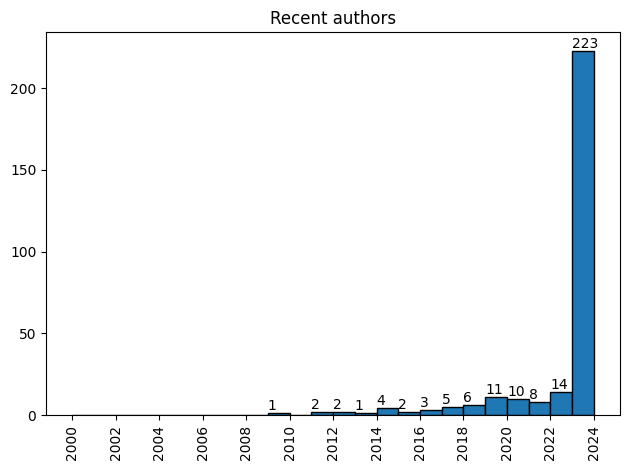

In [31]:
df_authors = df.loc[df['Is author']]

counts, bins, _ = plt.hist(df_authors['Last contribution'].dt.year, bins=range(2000, 2025), edgecolor='black')
    
# Add count labels on top of each bar
for i, count in enumerate(counts):
    if count:
        plt.text(bins[i], count, str(int(count)), ha='left', va='bottom')

x_ticks = range(2000, 2025, 2)  # This will set ticks every 2 years
plt.xticks(rotation=90, ha='center')
plt.gca().set_xticks(x_ticks)
plt.gca().set_title('Recent authors')
plt.tight_layout()
#plt.savefig('last_contrib_in_t2k_' + name + '.pdf')
plt.show()

In [32]:
len(df.loc[(df['Is author']) & (df['Ghost'])])

32

In [33]:
len(df.loc[(df['Is author']) & ([not x for x in df['Ghost']])])

/var/folders/r5/jldxfm3172j6qxcq0bxhyp4h0000gn/T/ipykernel_79049/1637490254.py:1: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  len(df.loc[(df['Is author']) & ([not x for x in df['Ghost']])])


292

In [34]:
len(df_authors.loc[df['Last contribution'].dt.year<2024])

98

In [35]:
len(df_authors)

324

In [36]:
len(df_authors.loc[df['Last contribution'].dt.year<2024])

98

In [37]:
df.loc[(df['Member since'].dt.year>=2024) & (df['Member since'].dt.month>=4)]

,First name,Last name,Username,Email,Institute,Country,Position,Member since,Last contribution,Ghost,Region,Is author
6,Haradhan,Adhikary,hadhikar,Haradhan.ADHIKARY@fuw.edu.pl,Warsaw University,Poland,Postdoc,2024-09-01,NaT,True,Europe,False
35,Anna,Beliakova,beliakova,beliakova@inr.ru,INR,Russia,Student MSc,2024-09-01,NaT,True,Europe,False
39,Pierre,Boistier,pboistier,pierre.boistier@cea.fr,CEA/DAPNIA Saclay,France,Student PhD,2024-04-01,NaT,True,Europe,False
79,Pauline,Collard,pcollard,pauline.collard@etu.univ-lyon1.fr,University of Geneva,Switzerland,Student MSc,2024-04-01,2024-07-23,False,Europe,False
97,Benjamin,Demarles,bdemarles,benjamin.demarles@universite-paris-saclay.fr,LLR Ecole polytechnique IN2P3,France,Faculty,2024-04-01,NaT,True,Europe,False
142,Naoki,Funayama,funayama,se24205c@st.omu.ac.jp,Osaka Metropolitan University,Japan,Student MSc,2024-04-01,2024-10-28,False,Asia,False
152,Raúl,González Jiménez,rgonzjim,raugj@us.es,University of Seville,Spain,Postdoc,2024-09-01,NaT,True,Europe,False
167,Masayuki,Harada,mharada,mharada@km.icrr.u-tokyo.ac.jp,"ICRR, Kamioka Observatory",Japan,Postdoc,2024-11-01,NaT,True,Asia,False
173,Koki,Hayashi,khayashi,hayashi.koki.78e@st.kyoto-u.ac.jp,Kyoto University,Japan,Student MSc,2024-07-01,NaT,True,Asia,False
190,Roger,Huang,rhuang,rghuang@lbl.gov,LBNL,USA,Postdoc,2024-09-01,NaT,True,America,False


In [38]:
len(df.loc[(df['Member since'].dt.year>=2024) & (df['Member since'].dt.month>=4)])

23

In [39]:
df_yng

,First name,Last name,Username,Email,Institute,Country,Position,Member since,Last contribution,Ghost,Region
0,Saul,Alonso Monsalve,saulmonsalve,saul.alonso.monsalve@cern.ch,ETHZ,Switzerland,Postdoc,2020-10-01,2024-11-01,False,Europe
3,Yassine I.,Alj Hakim,yaljhakim,y.alj-hakim20@imperial.ac.uk,Imperial College London,UK,Student PhD,2020-10-01,2024-11-01,False,Europe
6,Haradhan,Adhikary,hadhikar,Haradhan.ADHIKARY@fuw.edu.pl,Warsaw University,Poland,Postdoc,2024-09-01,NaT,True,Europe
7,Hannah,Alarakia-Charles,halarakia,h.alarakia-charles@lancaster.ac.uk,Lancaster University,UK,Student PhD,2022-10-01,2024-10-17,False,Europe
8,Seisho,Abe,seisho,seisho@icrr.u-tokyo.ac.jp,"ICRR, Kamioka Observatory",Japan,Postdoc,2023-04-01,2024-10-23,False,Asia
9,Mohamed A.,Ali,alim,alim6@uw.edu,University of Washington,USA,Student MSc,2020-11-01,NaT,True,America
10,Lauren,Anthony,lauren,lanthony@ic.ac.uk,Imperial College London,UK,Postdoc,2015-10-01,2019-05-29,False,Europe
11,Tomochika,Arai,arai,arai@hep.phys.s.u-tokyo.ac.jp,University of Tokyo,Japan,Student MSc,2023-03-01,2024-06-10,False,Asia
13,Koustubh A.,Apte,koustubhapte,k.apte22@imperial.ac.uk,Imperial College London,UK,Student PhD,2022-10-01,2024-08-14,False,Europe
14,Takuji,Arihara,0109takuji,arihara@hepmail.phys.se.tmu.ac.jp,Tokyo Metropolitan University,Japan,Student PhD,2019-02-01,2024-04-15,False,Asia


In [40]:
for x in list(df.loc[(df['Member since'].dt.year>=2024) & (df['Member since'].dt.month>=4)].Email):
    print(x)

Haradhan.ADHIKARY@fuw.edu.pl
beliakova@inr.ru
pierre.boistier@cea.fr
pauline.collard@etu.univ-lyon1.fr
benjamin.demarles@universite-paris-saclay.fr
se24205c@st.omu.ac.jp
raugj@us.es
mharada@km.icrr.u-tokyo.ac.jp
hayashi.koki.78e@st.kyoto-u.ac.jp
rghuang@lbl.gov
ishida.takehiro.t1@dc.tohoku.ac.jp
atsushi_kawabata@keio.jp
kobayashi.sota.t2@dc.tohoku.ac.jp
yufei@hep.phys.s.u-tokyo.ac.jp
robert.kralik@kcl.ac.uk
leplumey@llr.in2p3.fr
mashin@inr.ru
EOBrien4@sheffield.ac.uk
elise.paillol@etu.u-paris.fr
plancon@llr.in2p3.fr
lorenzo.restrepo@lpnhe.in2p3.fr
suzuki-mihiro-hs@ynu.jp
swada@stu.kobe-u.ac.jp
